In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp
V0 = 39.0333274517787
# V0 = sp.symbols('V0')

In [11]:
dis = 0.334
l = 0.75
L = 1
I = 0.012*0.05**3/12
E = 1e4/I*0.001
EI = E*I
x1 = np.arange(0,dis,0.001).reshape(-1,1)
x2 = np.arange(dis,l,0.001).reshape(-1,1)
x3 = np.arange(l,L+0.001,0.001).reshape(-1,1)
X1 = np.vstack((x1,x2,x3))

In [12]:
X1

array([[0.00e+00],
       [1.00e-03],
       [2.00e-03],
       ...,
       [9.98e-01],
       [9.99e-01],
       [1.00e+00]])

In [13]:
x = sp.symbols('x')
Q1_sym = 30-30*x
Q2_sym = 0*x+20
Q3_sym = 0*x

V1_sym = integrate(-Q1_sym, (x, 0, x  )) - V0
V2_sym = integrate(-Q1_sym, (x, 0, dis))+integrate(-Q2_sym, (x, dis, x))-V0
V3_sym = (integrate(-Q1_sym, (x, 0, dis))+integrate(-Q2_sym, (x, dis, l))+integrate(-Q3_sym, (x, l, x)))*0+100

M1_sym = integrate(V1_sym, (x, 0, x  ))
M2_sym = integrate(V1_sym, (x, 0, dis))+integrate(V2_sym , (x, dis, x))
M3_sym = (integrate(V1_sym, (x, 0, dis))+integrate(V2_sym, (x, dis, l))+integrate(V3_sym, (x, l, x)))

fai1_sym = integrate(M1_sym, (x, 0, x  ))
fai2_sym = integrate(M1_sym, (x, 0, dis))+integrate(M2_sym , (x, dis, x))
fai3_sym = (integrate(M1_sym, (x, 0, dis))+integrate(M2_sym, (x, dis, l))+integrate(M3_sym, (x, l, x)))

W1_sym = -integrate(fai1_sym, (x, 0, x  ))
W2_sym = -(integrate(fai1_sym, (x, 0, dis))+integrate(fai2_sym , (x, dis, x)))
W3_sym = -(integrate(fai1_sym, (x, 0, dis))+integrate(fai2_sym, (x, dis, l))+integrate(fai3_sym, (x, l, x)))

In [14]:
M1_func = sp.lambdify(x, M1_sym, 'numpy')
M2_func = sp.lambdify(x, M2_sym, 'numpy')
M3_func = sp.lambdify(x, M3_sym, 'numpy')
M1 = M1_func(x1)
M2 = M2_func(x2)
M3 = M3_func(x3)
M = np.vstack((M1,M2,M3))
M[-1][0]

18.31018796 - 0.75*V0

In [15]:
dis = 1/3
l = 0.75
L = 1
x = sp.symbols('x')
Q1_sym = 30-30*x
Q2_sym = 0*x+20
Q3_sym = 0*x

V1_sym = integrate(-Q1_sym, (x, 0, x  )) - V0
V2_sym = integrate(-Q1_sym, (x, 0, dis))+integrate(-Q2_sym, (x, dis, x))-V0
V3_sym = (integrate(-Q1_sym, (x, 0, dis))+integrate(-Q2_sym, (x, dis, l))+integrate(-Q3_sym, (x, l, x)))*0+100

M1_sym = integrate(V1_sym, (x, 0, x  ))-M[-1][0]
M2_sym = integrate(V1_sym, (x, 0, dis))+integrate(V2_sym , (x, dis, x))-M[-1][0]
M3_sym = (integrate(V1_sym, (x, 0, dis))+integrate(V2_sym, (x, dis, l))+integrate(V3_sym, (x, l, x)))-M[-1][0]

fai1_sym = 1/EI*integrate(M1_sym, (x, 0, x  ))
fai2_sym = 1/EI*(integrate(M1_sym, (x, 0, dis))+integrate(M2_sym , (x, dis, x)))
fai3_sym = 1/EI*(integrate(M1_sym, (x, 0, dis))+integrate(M2_sym, (x, dis, l))+integrate(M3_sym, (x, l, x)))

W1_sym = -integrate(fai1_sym, (x, 0, x  ))
W2_sym = -(integrate(fai1_sym, (x, 0, dis))+integrate(fai2_sym , (x, dis, x)))
W3_sym = -(integrate(fai1_sym, (x, 0, dis))+integrate(fai2_sym, (x, dis, l))+integrate(fai3_sym, (x, l, x)))

In [16]:
# known_values = {x: 0.75, W2_sym: 0}

# # 解方程
# solution = sp.solve(W2_sym.subs(x, known_values[x]) - known_values[W2_sym], V0)
# print(solution)

[39.0333274517787]


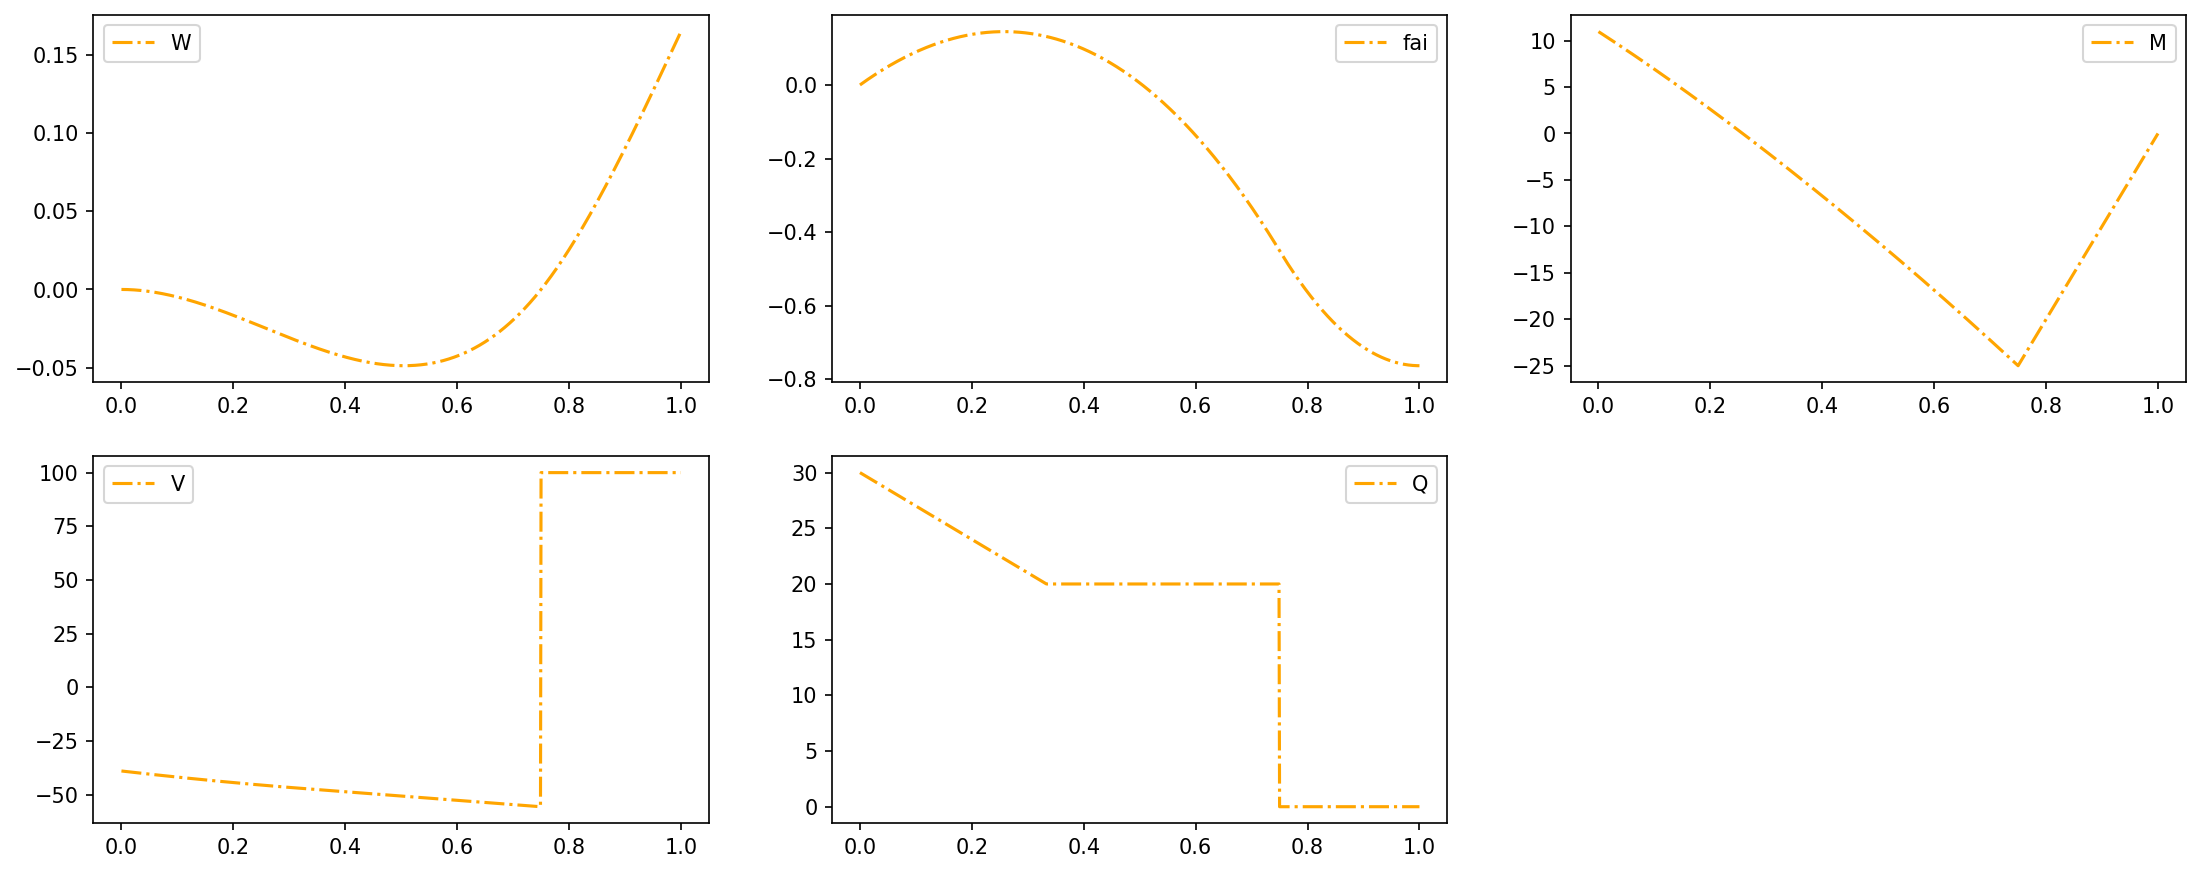

In [7]:
Q1_func = sp.lambdify(x, Q1_sym, 'numpy')
Q2_func = sp.lambdify(x, Q2_sym, 'numpy')
Q3_func = sp.lambdify(x, Q3_sym, 'numpy')

V1_func = sp.lambdify(x, V1_sym, 'numpy')
V2_func = sp.lambdify(x, V2_sym, 'numpy')
V3_func = sp.lambdify(x, V3_sym, 'numpy')

M1_func = sp.lambdify(x, M1_sym, 'numpy')
M2_func = sp.lambdify(x, M2_sym, 'numpy')
M3_func = sp.lambdify(x, M3_sym, 'numpy')

fai1_func = sp.lambdify(x, fai1_sym, 'numpy')
fai2_func = sp.lambdify(x, fai2_sym, 'numpy')
fai3_func = sp.lambdify(x, fai3_sym, 'numpy')

W1_func = sp.lambdify(x, W1_sym, 'numpy')
W2_func = sp.lambdify(x, W2_sym, 'numpy')
W3_func = sp.lambdify(x, W3_sym, 'numpy')

Q1 = Q1_func(x1)
Q2 = x2*0+20
Q3 = x3*0
ddddWW1 = np.vstack((Q1,Q2,Q3))

V1 = V1_func(x1)
V2 = V2_func(x2)
V3 = x3*0+V3_func(x3)
dddWW1 = np.vstack((V1,V2,V3))

M1 = M1_func(x1)
M2 = M2_func(x2)
M3 = M3_func(x3)
ddWW1 = np.vstack((M1,M2,M3))

fai1 = fai1_func(x1)
fai2 = fai2_func(x2)
fai3 = fai3_func(x3)
dWW1 = np.vstack((fai1,fai2,fai3))

W1 = W1_func(x1)
W2 = W2_func(x2)
W3 = W3_func(x3)
WW1 = np.vstack((W1,W2,W3))

dfai_real = ddWW1/EI
plt.figure(figsize=(18,7),dpi=150)
plt.subplot(2,3,1)
# plt.vlines(0.75,-0.05,0.15)
# plt.hlines(0,0.6,0.8)
plt.plot(X1,WW1,label="W", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(2,3,2)
plt.plot(X1,dWW1,label="fai", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(2, 3, 3)
plt.plot(X1,ddWW1,label="M", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(2, 3, 4)
plt.plot(X1,dddWW1,label="V", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(2, 3, 5)
plt.plot(X1,ddddWW1,label="Q", linestyle='dashdot', color='orange')
plt.legend()

In [8]:
# M2_func(0.75)